In [56]:

library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

In [50]:
crime_data <- read_csv('crimedata_csv_AllNeighbourhoods_AllYears.csv') %>%
    mutate(TYPE = as_factor(TYPE),
          NEIGHBOURHOOD = as_factor(NEIGHBOURHOOD)) %>%
    drop_na()
head(crime_data)

Rows: 868146 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
Theft from Vehicle,2008,12,7,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2009,8,28,19,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2012,7,25,12,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2014,5,8,12,49,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2014,10,19,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
Theft from Vehicle,2015,2,18,18,30,11XX E HASTINGS ST,Strathcona,494141.1,5458690


In [51]:
# select crime_data with only chosen neighborhood and type
crime_data_clean <- crime_data %>%
    drop_na() %>%
    select(TYPE, NEIGHBOURHOOD) %>%
    group_by(TYPE)


head(crime_data_clean)

crime_data_total <- crime_data_clean %>%
    summarise(total = n())
    

mount_pleasant_n <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == 'Mount Pleasant') %>%
    summarise(MountPleasent = n())

strathcona_n <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == 'Strathcona') %>%
    summarise(Strathcona = n())


crime_data_sum <- crime_data_total %>%
    inner_join(mount_pleasant_n, by = 'TYPE') %>%
    inner_join(strathcona_n, by = 'TYPE') %>%
    mutate(MountPleasent_prop = MountPleasent/sum(total)) %>%
    mutate(strathcona_prop = Strathcona/sum(total)) %>%
    mutate(prop_diff = MountPleasent_prop - strathcona_prop) %>%
    mutate(MountPleasent_mean = mean(MountPleasent))





TYPE,NEIGHBOURHOOD
<fct>,<fct>
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona
Theft from Vehicle,Strathcona


In [4]:
crime_data_total

TYPE,total
<fct>,<int>
Theft from Vehicle,240856
Theft of Bicycle,36930
Theft of Vehicle,44710
Vehicle Collision or Pedestrian Struck (with Fatality),347
Vehicle Collision or Pedestrian Struck (with Injury),28839
Break and Enter Commercial,47310
Break and Enter Residential/Other,72174
Homicide,309
Mischief,105195


In [5]:
crime_data_sum

TYPE,total,MountPleasent,Strathcona,MountPleasent_prop,strathcona_prop,prop_diff,MountPleasent_mean
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Theft from Vehicle,240856,13345,13161,1.537457e-02,1.516258e-02,0.0002119835,4971
Theft of Bicycle,36930,3955,1692,4.556494e-03,1.949327e-03,0.0026071669,4971
Theft of Vehicle,44710,3118,2250,3.592199e-03,2.592190e-03,0.0010000092,4971
Vehicle Collision or Pedestrian Struck (with Fatality),347,21,34,2.419377e-05,3.917087e-05,-0.0000149771,4971
Vehicle Collision or Pedestrian Struck (with Injury),28839,2124,1559,2.447027e-03,1.796100e-03,0.0006509277,4971
Break and Enter Commercial,47310,4122,3146,4.748892e-03,3.624457e-03,0.0011244343,4971
Break and Enter Residential/Other,72174,3872,2681,4.460871e-03,3.088738e-03,0.0013721325,4971
Homicide,309,19,32,2.188960e-05,3.686670e-05,-0.0000149771,4971
Mischief,105195,6102,8142,7.030019e-03,9.380271e-03,-0.0023502521,4971


In [6]:
summary(crime_data_clean)

                                TYPE                          NEIGHBOURHOOD   
 Theft from Vehicle               :240856   Central Business District:233260  
 Other Theft                      :215709   West End                 : 78052  
 Mischief                         :105195   Strathcona               : 55744  
 Offence Against a Person         : 75613   Mount Pleasant           : 54681  
 Break and Enter Residential/Other: 72174   Fairview                 : 53340  
 Break and Enter Commercial       : 47310   Grandview-Woodland       : 48805  
 (Other)                          :111135   (Other)                  :344110  

In [8]:
dataMP <- crime_data_clean |>
            filter(NEIGHBOURHOOD == "Mount Pleasant") |>
            group_by(TYPE) |>
            summarize(n= n())



dataS <- crime_data_clean |>
            filter(NEIGHBOURHOOD == "Strathcona") |>
            group_by(TYPE) |>
            summarize(n= n())

dataMP
dataS

TYPE,n
<fct>,<int>
Theft from Vehicle,13345
Theft of Bicycle,3955
Theft of Vehicle,3118
Vehicle Collision or Pedestrian Struck (with Fatality),21
Vehicle Collision or Pedestrian Struck (with Injury),2124
Break and Enter Commercial,4122
Break and Enter Residential/Other,3872
Homicide,19
Mischief,6102


TYPE,n
<fct>,<int>
Theft from Vehicle,13161
Theft of Bicycle,1692
Theft of Vehicle,2250
Vehicle Collision or Pedestrian Struck (with Fatality),34
Vehicle Collision or Pedestrian Struck (with Injury),1559
Break and Enter Commercial,3146
Break and Enter Residential/Other,2681
Homicide,32
Mischief,8142


In [36]:
neighbor_total <- crime_data %>%
    select(NEIGHBOURHOOD) %>%
    summarise(n = n()) %>%
    pull()
neighbor_total

[1] 867992

In [68]:
dataMP_prop <- dataMP |>
     summarize(total_number_of_crime= sum(n)) |>
    mutate(prop = total_number_of_crime/neighbor_total) |>
     mutate(location = 'Mount Pleasant')


dataS_prop <- dataS |>
      summarize(total_number_of_crime= sum(n))  |>
    mutate(prop = total_number_of_crime/neighbor_total) |>
 mutate(location = 'Strathcona')
    

In [65]:
dataMP_prop

total_number_of_crime,prop,location
<int>,<dbl>,<chr>
54681,0.06299712,Mount Pleasant


In [69]:
dataS_prop

total_number_of_crime,prop,location
<int>,<dbl>,<chr>
55744,0.06422179,Strathcona


In [74]:
proportion <- rbind(dataS_prop, dataMP_prop) 


proportion

total_number_of_crime,prop,location
<int>,<dbl>,<chr>
55744,0.06422179,Strathcona
54681,0.06299712,Mount Pleasant


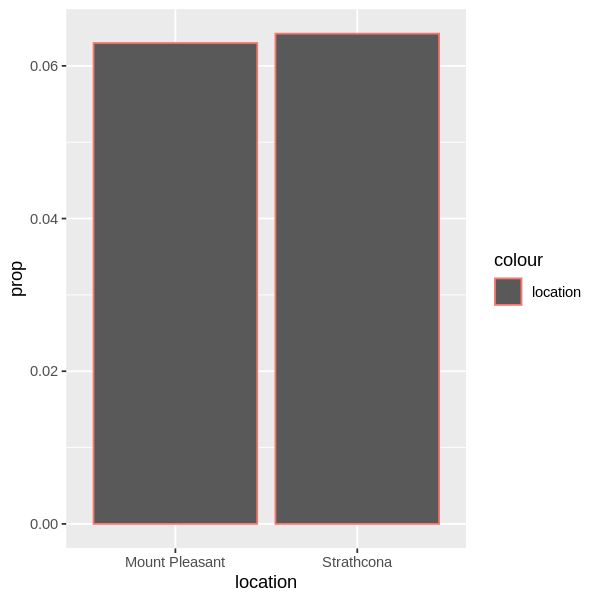

In [80]:
options(repr.plot.width = 5, repr.plot.height = 5)
prop_plot <- proportion %>%
    ggplot(aes(x=location, y=prop, color='location')) +
    geom_bar(stat = 'identity') +
    labs()

prop_plot

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)
pop <- crime_data_clean %>%
    filter(NEIGHBOURHOOD == c('Strathcona', "Mount Pleasant" )) %>%
    group_by(NEIGHBOURHOOD) %>%
    summarise(n=n())

pop_plot <- pop %>%
    ggplot(aes(x=NEIGHBOURHOOD, y=n, fill = NEIGHBOURHOOD)) +
    geom_bar(stat = 'identity') +
    labs(x = "Neighbourhood",
       y = "Count", 
       fill = "Neighbourhood",
       title = "Total Number of Crime between Locations")
pop_plot

In [55]:
options(repr.plot.width = 15, repr.plot.height = 10)
mountpleasant_sum_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y= MountPleasent_prop, fill=TYPE)) +
    geom_bar(stat = 'identity') +
    labs(y='Proportion(Mount Pleasant)', x='Type of Crimes') +
    ggtitle('Mount Pleasant Proportion of All Crimes') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15))


In [54]:
options(repr.plot.width = 15, repr.plot.height = 10)
strathcona_sum_plot <- crime_data_sum %>%
    ggplot(aes(x=TYPE, y=strathcona_prop, fill=TYPE)) +
    geom_bar(stat = 'identity') +
    labs(y='Proportion(Strathcona)', x='Type of Crimes') +
    ggtitle('Strathconat Proportion of All Crimes') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1, size=15))



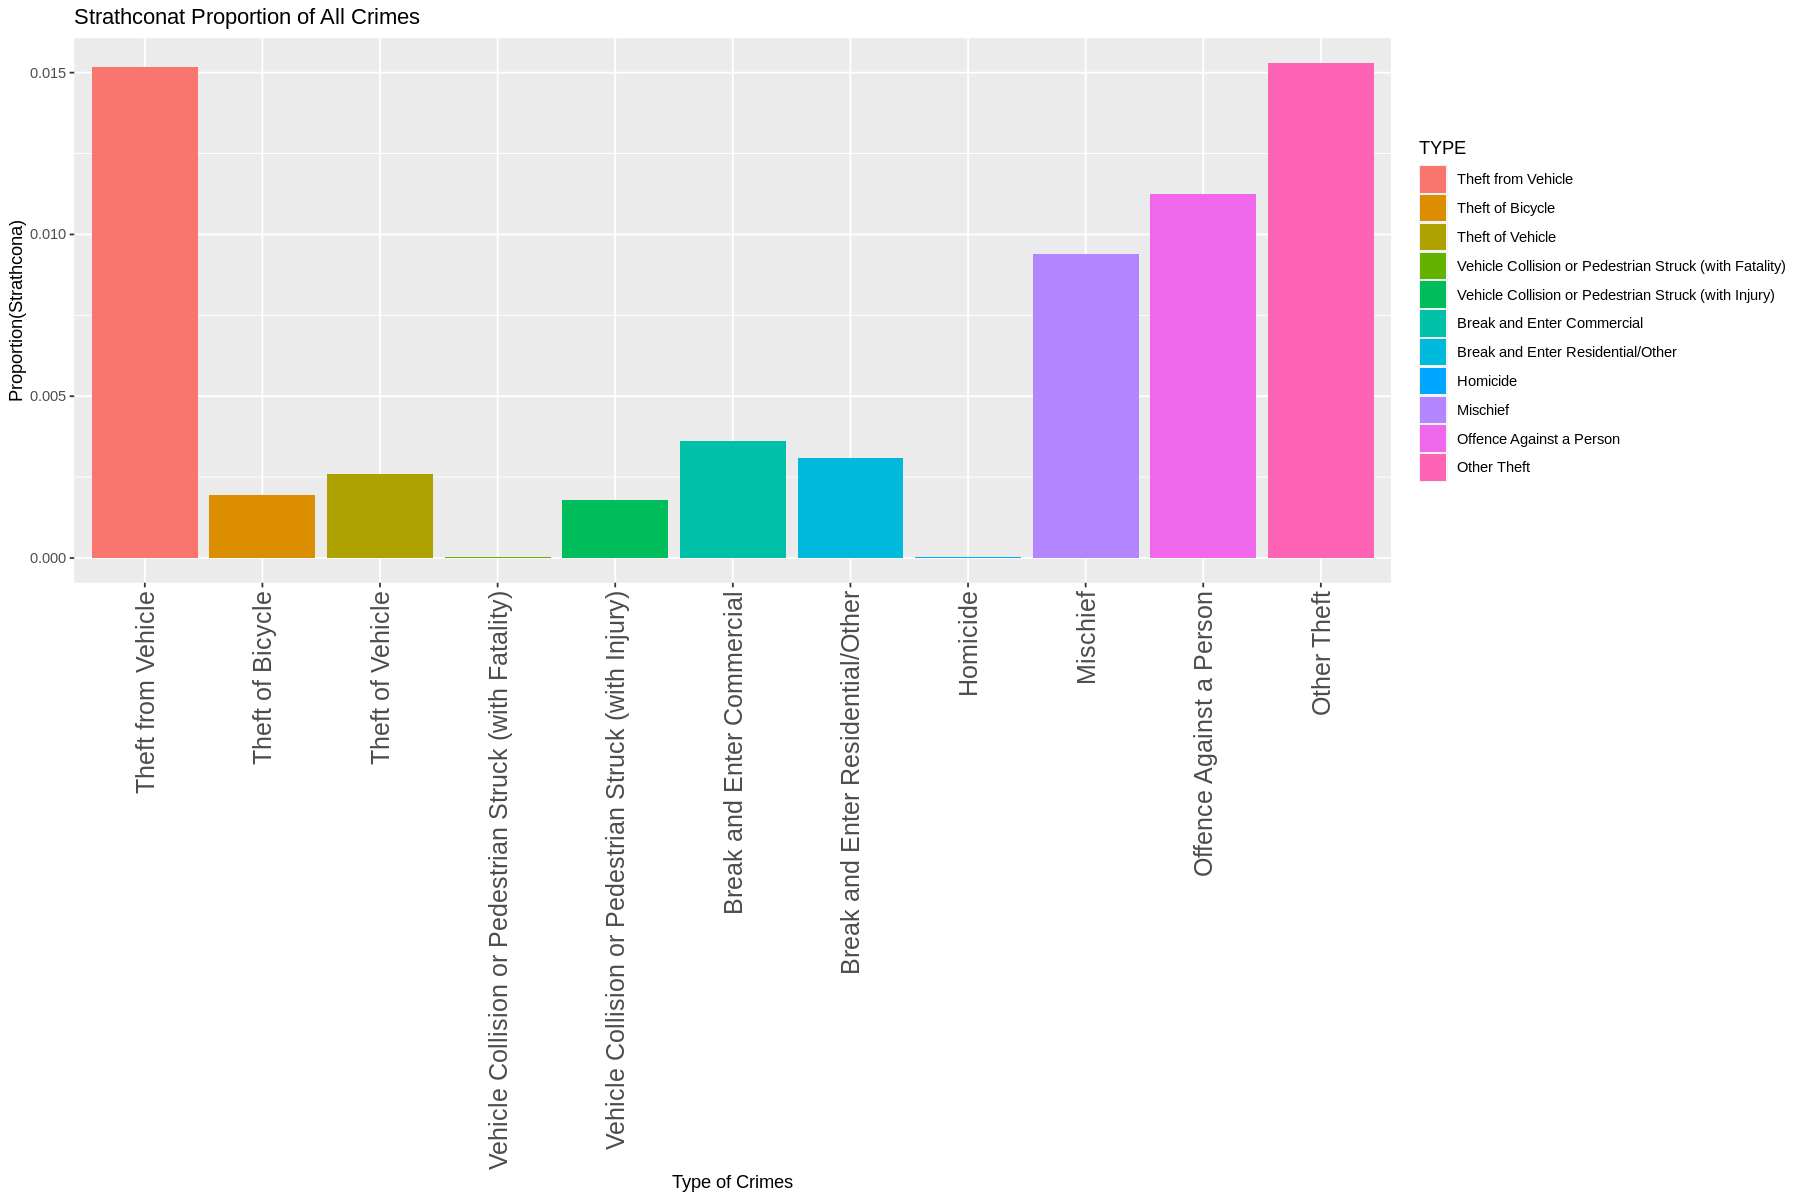

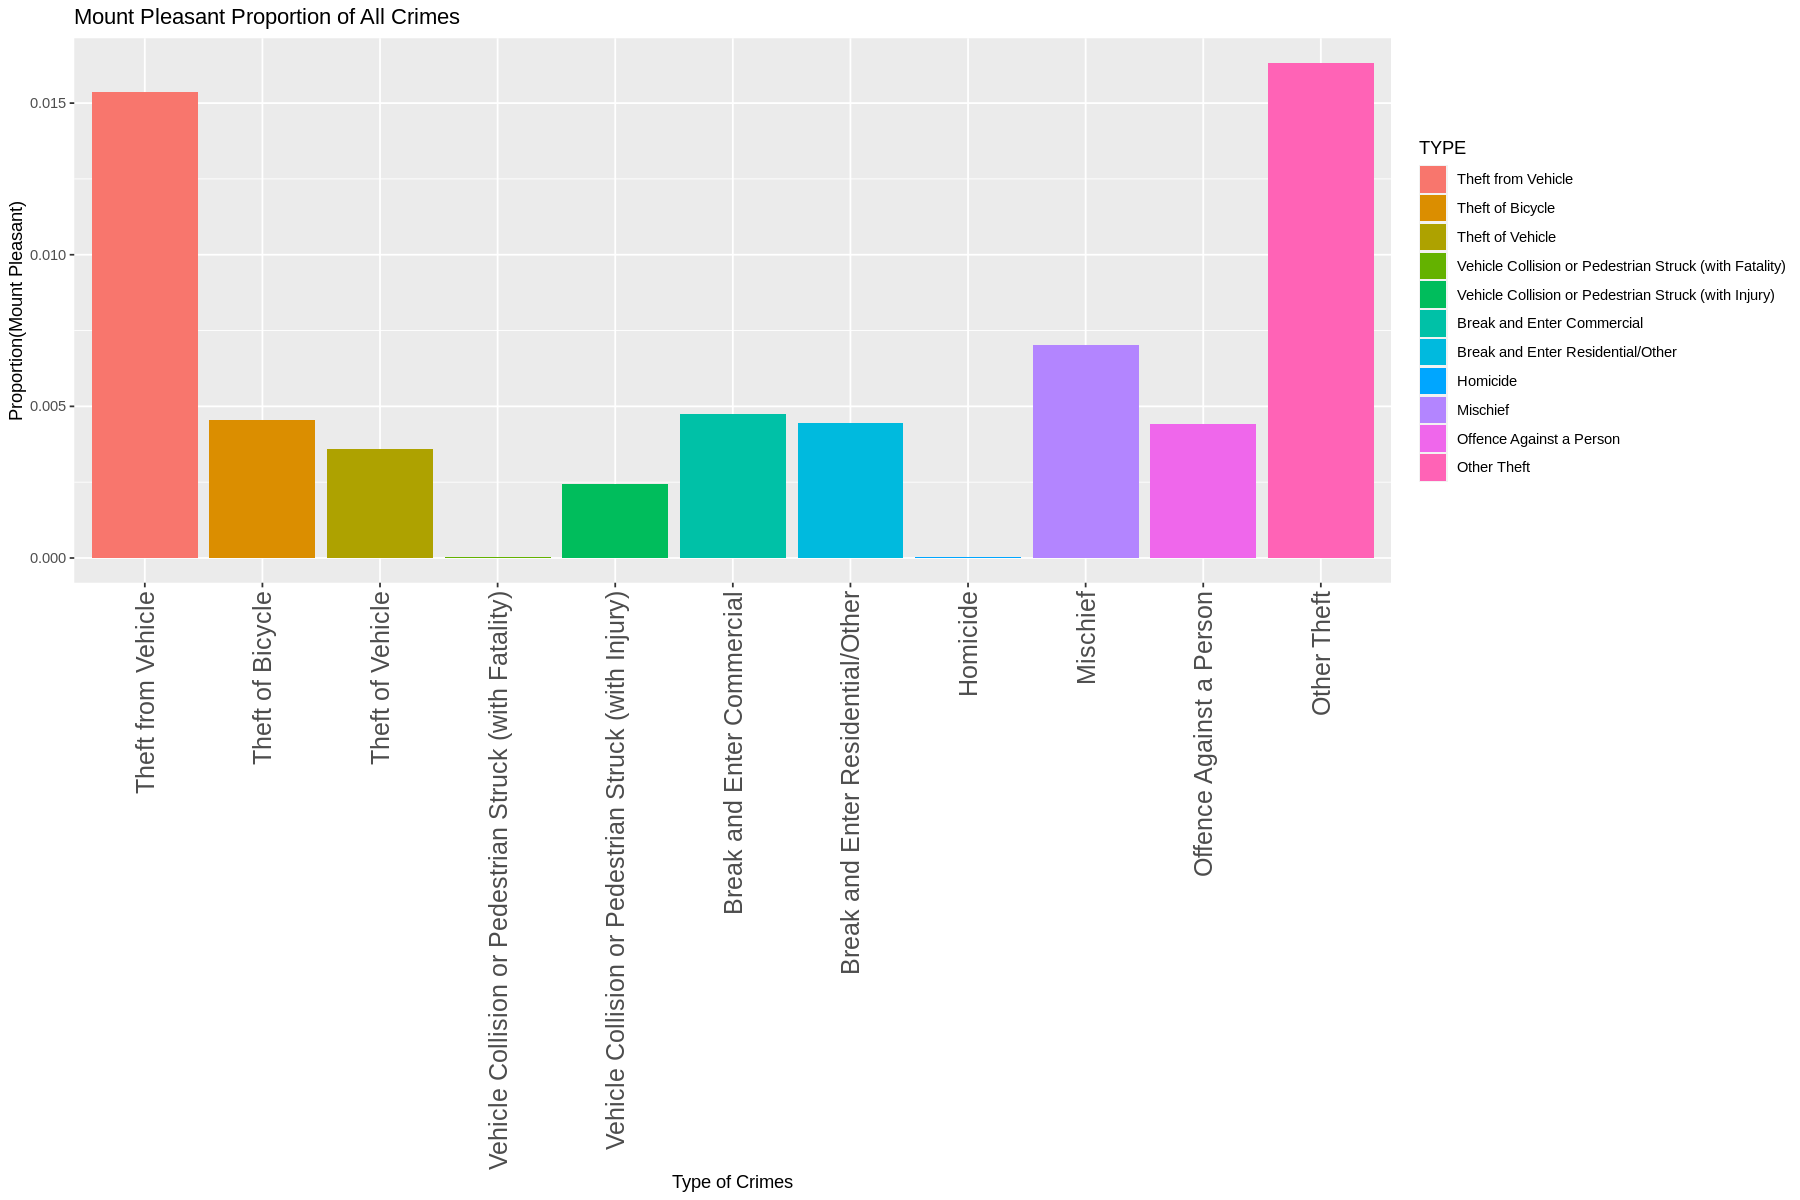

In [53]:
strathcona_sum_plot
mountpleasant_sum_plot

TYPE,neighborhood,prop
<fct>,<chr>,<dbl>
Theft from Vehicle,MP,1.537457e-02
Theft of Bicycle,MP,4.556494e-03
Theft of Vehicle,MP,3.592199e-03
Vehicle Collision or Pedestrian Struck (with Fatality),MP,2.419377e-05
Vehicle Collision or Pedestrian Struck (with Injury),MP,2.447027e-03
Break and Enter Commercial,MP,4.748892e-03
Break and Enter Residential/Other,MP,4.460871e-03
Homicide,MP,2.188960e-05
Mischief,MP,7.030019e-03


TYPE,neighborhood,prop
<fct>,<chr>,<dbl>
Theft from Vehicle,S,1.516258e-02
Theft of Bicycle,S,1.949327e-03
Theft of Vehicle,S,2.592190e-03
Vehicle Collision or Pedestrian Struck (with Fatality),S,3.917087e-05
Vehicle Collision or Pedestrian Struck (with Injury),S,1.796100e-03
Break and Enter Commercial,S,3.624457e-03
Break and Enter Residential/Other,S,3.088738e-03
Homicide,S,3.686670e-05
Mischief,S,9.380271e-03


TYPE,neighborhood,prop
<fct>,<chr>,<dbl>
Theft from Vehicle,MP,1.537457e-02
Theft of Bicycle,MP,4.556494e-03
Theft of Vehicle,MP,3.592199e-03
Vehicle Collision or Pedestrian Struck (with Fatality),MP,2.419377e-05
Vehicle Collision or Pedestrian Struck (with Injury),MP,2.447027e-03
Break and Enter Commercial,MP,4.748892e-03
Break and Enter Residential/Other,MP,4.460871e-03
Homicide,MP,2.188960e-05
Mischief,MP,7.030019e-03


TYPE,total,MountPleasent,Strathcona,MountPleasent_prop,strathcona_prop,prop_diff,MountPleasent_mean
<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Theft from Vehicle,240856,13345,13161,1.537457e-02,1.516258e-02,0.0002119835,4971
Theft of Bicycle,36930,3955,1692,4.556494e-03,1.949327e-03,0.0026071669,4971
Theft of Vehicle,44710,3118,2250,3.592199e-03,2.592190e-03,0.0010000092,4971
Vehicle Collision or Pedestrian Struck (with Fatality),347,21,34,2.419377e-05,3.917087e-05,-0.0000149771,4971
Vehicle Collision or Pedestrian Struck (with Injury),28839,2124,1559,2.447027e-03,1.796100e-03,0.0006509277,4971
Break and Enter Commercial,47310,4122,3146,4.748892e-03,3.624457e-03,0.0011244343,4971
Break and Enter Residential/Other,72174,3872,2681,4.460871e-03,3.088738e-03,0.0013721325,4971
Homicide,309,19,32,2.188960e-05,3.686670e-05,-0.0000149771,4971
Mischief,105195,6102,8142,7.030019e-03,9.380271e-03,-0.0023502521,4971


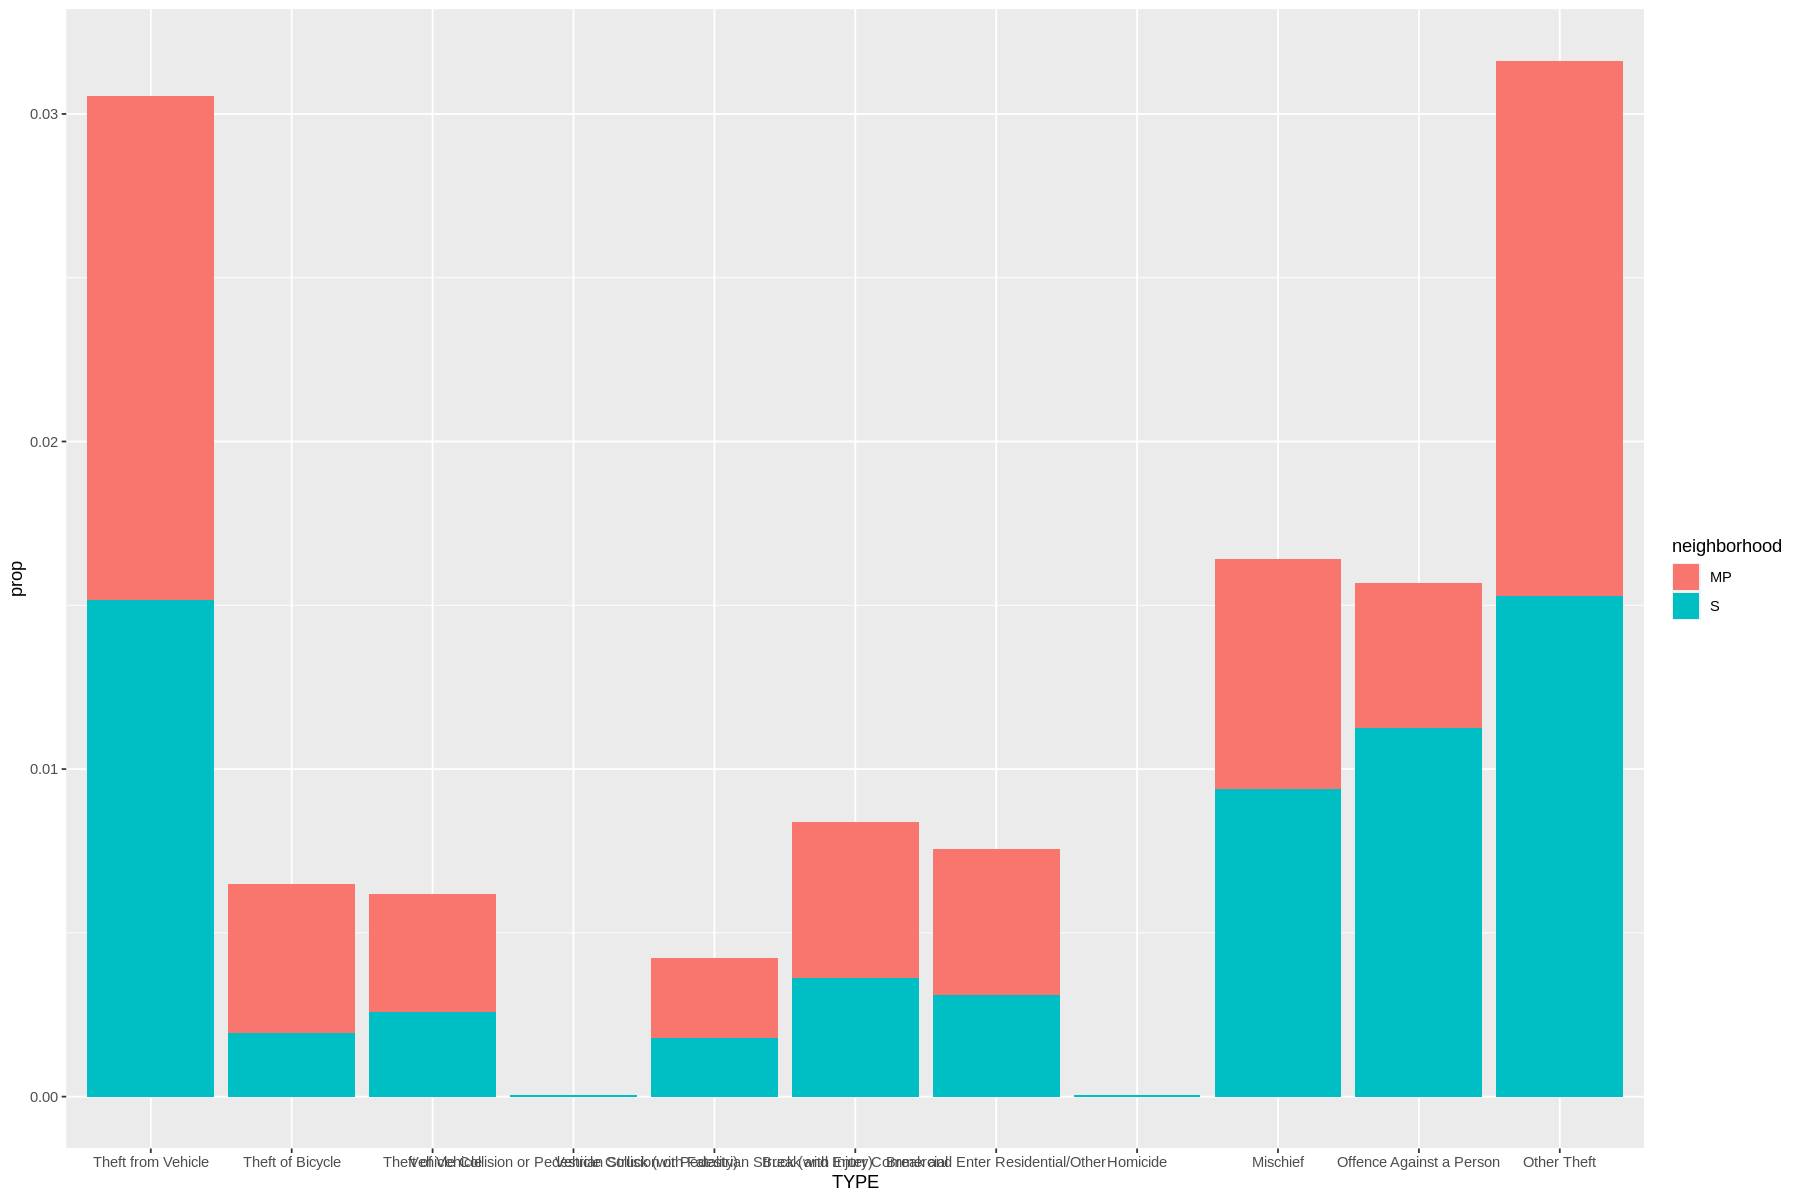

In [107]:
options(repr.plot.width = 15, repr.plot.height = 10)

mp_prop <- crime_data_sum %>%
    select(MountPleasent_prop, TYPE) %>%
    mutate(neighborhood = 'MP', 
          prop = MountPleasent_prop) %>%
    select(-MountPleasent_prop)

s_prop <- crime_data_sum %>%
    select(strathcona_prop, TYPE) %>%
    mutate(neighborhood = 'S', 
          prop = strathcona_prop)  %>%
    select(-strathcona_prop)

    
all_prop <- rbind(mp_prop, s_prop)

combined_prop_plot <- all_prop %>%
    ggplot(aes(x=TYPE, y=prop, fill = neighborhood)) +
    geom_bar(stat = 'identity')

combined_prop_plot

all_prop
s_prop
mp_prop
crime_data_sum
